import the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

load into a dataframe

In [3]:
df = pd.read_csv(
    r"C:\\Users\\user\\Downloads\\metadata.csv.zip",  # <-- Path to your dataset
    nrows=500,                                    # Load only first 500 rows
    low_memory=False                              # Avoid dtype guessing issues
)

explore the structure

In [4]:
print(df.shape)     # Check size
print(df.info())    # Data types, null counts
print(df.head())    # Preview data

(500, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cord_uid          500 non-null    object 
 1   sha               479 non-null    object 
 2   source_x          500 non-null    object 
 3   title             500 non-null    object 
 4   doi               500 non-null    object 
 5   pmcid             500 non-null    object 
 6   pubmed_id         500 non-null    int64  
 7   license           500 non-null    object 
 8   abstract          478 non-null    object 
 9   publish_time      500 non-null    object 
 10  authors           489 non-null    object 
 11  journal           500 non-null    object 
 12  mag_id            0 non-null      float64
 13  who_covidence_id  0 non-null      float64
 14  arxiv_id          0 non-null      float64
 15  pdf_json_files    479 non-null    object 
 16  pmc_json_files    477 non-null    

look at missing values and summary statistics

In [5]:
print(df.isnull().sum())   # Count of nulls per column
print(df.describe(include='all'))     # Summary stats for numeric and categorical columns

cord_uid              0
sha                  21
source_x              0
title                 0
doi                   0
pmcid                 0
pubmed_id             0
license               0
abstract             22
publish_time          0
authors              11
journal               0
mag_id              500
who_covidence_id    500
arxiv_id            500
pdf_json_files       21
pmc_json_files       23
url                   0
s2_id               500
dtype: int64
        cord_uid                                       sha source_x  \
count        500                                       479      500   
unique       500                                       479        1   
top     ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
freq           1                                         1      500   
mean         NaN                                       NaN      NaN   
std          NaN                                       NaN      NaN   
min          NaN                  

# Data cleaning and preparation

handle missing values

In [6]:
missing_values = df.isnull().sum().sort_values(ascending=False)   # Sort columns by missing values
print(missing_values.head())  # Print top columns with most missing values

who_covidence_id    500
arxiv_id            500
s2_id               500
mag_id              500
pmc_json_files       23
dtype: int64


clean date columns

In [8]:
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce') # Convert to datetime
df['year'] = df['publish_time'].dt.year  # Extract year
df['month'] = df['publish_time'].dt.month # Extract month
df['day'] = df['publish_time'].dt.day     # Extract day

save a cleaned version

In [13]:
df_clean = df.copy()
df_clean.to_csv("metadata_clean.csv", index=False)

# Data analysis and visualisation

publication per year

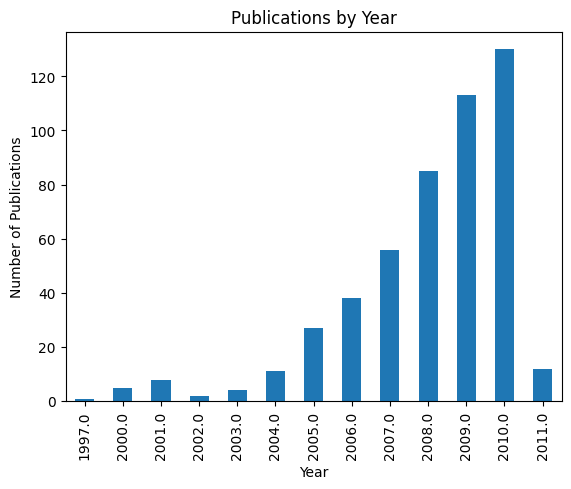

In [12]:
year_counts = df_clean['year'].value_counts().sort_index()  # Count publications per year
year_counts.plot(kind='bar', title='Publications by Year')  # Bar chart of publications per year
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()

top journas

<Axes: title={'center': 'Top Journals'}, ylabel='journal'>

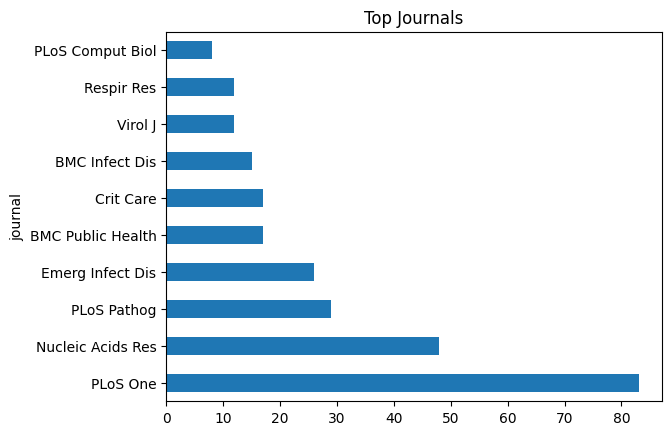

In [14]:
top_journals = df_clean['journal'].value_counts().head(10)
top_journals.plot(kind='barh', title='Top Journals')

frequent words in titles

In [15]:
from collections import Counter
words = " ".join(df_clean['title'].dropna()).lower().split()
common_words = Counter(words).most_common(20)
print(common_words)

[('of', 373), ('and', 224), ('the', 222), ('in', 214), ('a', 163), ('for', 102), ('influenza', 74), ('to', 71), ('virus', 61), ('human', 45), ('by', 39), ('infection', 35), ('an', 35), ('with', 35), ('pandemic', 31), ('using', 28), ('from', 27), ('on', 26), ('protein', 26), ('disease', 24)]


visalization

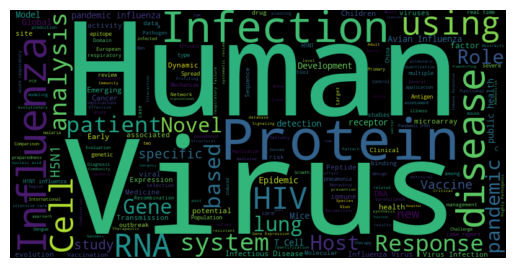

In [16]:
from wordcloud import WordCloud
wc = WordCloud(width=800, height=400).generate(" ".join(df_clean['title'].dropna()))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


# Streamlit app

basic layout

In [17]:
import streamlit as st
import matplotlib.pyplot as plt

st.title("CORD-19 Data Explorer")
st.write("Explore COVID-19 research publications")


2025-09-21 18:45:32.344 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 18:45:33.757 
  command:

    streamlit run c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-21 18:45:33.758 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 18:45:33.759 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 18:45:33.760 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 18:45:33.762 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 18:45:33.763 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


interaction elements

In [ ]:
years = df_clean['year'].dropna().astype(int).unique()
min_year, max_year = years.min(), years.max() # Get min and max year
year_range = st.slider("Select Year Range", min_year, max_year, (2020, 2021))

filtered = df_clean[(df_clean['year'] >= year_range[0]) & (df_clean['year'] <= year_range[1])] # Filter by year range
st.write(filtered.head())


2025-09-21 18:45:37.929 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 18:45:37.932 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 18:45:37.937 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 18:45:37.940 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 18:45:37.942 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 18:45:37.943 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 18:45:38.035 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 18:45:38.037 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

show charts in the app

In [19]:
st.bar_chart(filtered['year'].value_counts().sort_index())

2025-09-21 18:45:48.666 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 18:45:48.667 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 18:45:48.668 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()